# ML5: Neural Networks
- Name: Gelli Mae Gloria
- Date: January 14, 2021
- Student Number: 2015-06435

### Preliminaries
Import all important packages from Python: 
* **Pandas**: Reading and loading the file; make dataframes 
* **Numpy**: For multidimensional array and operations on arrays
* **Matplotlib/Seaborn**: For our visualizations
* **Random**: For the initialization of the random number generator for the weights

In [1]:
# Import important packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from random import seed
from cvxopt import matrix

## I - Neural Network for regression
The objective of this activity is to make a program to learn a sine function.

### A. Sine function Dataset
First, we generate our training points to feed to our neural network. Here, we have collected 100 set of points for this part of the activity.

(50, 2)

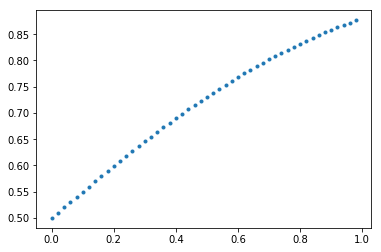

In [603]:
x = np.arange(0,1,0.02)                  # Feature
y = 0.5*np.sin(2*np.pi*x)+0.5            # Desireed Output (Actual) 
# y = 0.5*np.sin(x)+0.5

x = x.reshape(50,1)                     
y = y.reshape(50,1)

plt.plot(x,tanh(x),'.')                        # Visualize the training points

# We set up the necessary matrices (x_train - [bias, feature1] and 
#                                   y - [Actual])
data = pd.DataFrame(x)
data = data.rename(columns = {0:'x_1'})
data['x_0'] = 1

x_train=np.array(data[['x_0','x_1']]) 
data.shape

### B. Defining Functions
Here, we define functions for our neural network model.
1. **Activation functions:**
    - `lin()`  - Linear function
    - `sigm()` - Sigmoid function
    - `tanh()` - Hyperbolic tangent
    - `reclin()` - Rectified Linear
    
2. `initialize()` - function that returns a dictionary containing the weights
3. `predict()` - function for prediction from our neural network; contains the cost function
4. `accuracy_metric()` - function that calculates the accuracy from the actual and prediction

In [601]:
# Activation functions and their corresponding derivatives
def lin(x, deriv = False):
    if (deriv == True):
        return 1
    else:
        return x

def tanh(x, deriv = False):
#     t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    t = np.tanh(x)/2 + 0.5
    if (deriv == True):
        return 1+t**2
    else:
        return t

def sigm(x, deriv = False):
    s = (1/(1+np.exp(-x)))
    if (deriv == True):
        return s*(1-s)
    else:
        return s
    
def relu(x, deriv = False):
    if (deriv == True):
        dg = np.maximum(0,1)
        return dg
    else:
        return np.maximum(0,x)
#         b = np.zeros((x.shape[0],x.shape[1]))
#         for i in range(x.shape[0]):
#             for j in range(x.shape[1]):
#                 b[i,j] = max(0,x[i,j])
#                 b[i,j] = float(b[i,j]>0)
#         return b
#     else:
#         b = np.zeros((x.shape[0],x.shape[1]))
#         for i in range(x.shape[0]):
#             for j in range(x.shape[1]):
#                 b[i,j] = max(0,x[i,j])
#         return b
    

In [560]:
# GRADED FUNCTION: initialize_parameters

def initialize(n_i, n_h, n_o):
    """
    Uses pseudo-random number generator to initialize our weights

    Parameters
    ----------
        n_i -- number of inputs/features
        n_h -- size of hidden layer/s
        n_o -- size of the output layer
    
    Returns:
        weights -- python dictionary containing our weights for the 2 layers (1 hidden and output):
                    W1 -- weight matrix of shape (n_i, n_h) [input -> hidden]
                    W2 -- weight matrix of shape (n_h, n_o) [hidden -> output]
    """
    seed(2)
    
    w0 = np.random.randn(n_h,n_i) * 0.01
    w1 = np.random.randn(n_o,n_h) * 0.01
    b2 = np.ones(n_o)
    b1 = np.ones(n_h)
    
    weights = {"W0": w0,
               "W1": w1,
               "b1": b1,
               "b2": b2}
    
    return weights

In [561]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [774]:
# Lezz train
def predict(x, y, weights, l_rate, iteration, h_activation, out_activation):
    """
    1-layer Neural Network
    
    Parameters
    ----------
        x              -- array; contains the bias x_0 and the feature/s of the samples  
        y              -- array; contains the actual values of the classes  
        weights        -- dictionary containing the initial weights (random) 
        l_rate         -- learning ratewhich is a scalar value usually of range 0 to 1
        iteration      -- scalar; number of epoch
        h_activation   -- activation function to be used from the input layer to the hidden layer
        out_activation -- activation function to be used from the hidden layer to the output layer
    
    Returns
    -------
        weights -- dictionary containing the updated weights
        grads   -- dictionary containing the gradients and the cost for each epoch
        layer2  -- array of the prediction

    """
    w0 = weights['W0']
    w1 = weights['W1']
    b2 = weights['b2']
    b1 = weights['b1']
    error = []
    delta1 = []
    delta2 = []
    erf = []
    
    l_rate2 = 0.05
#     change = np.zeros((iteration//10, weights.shape[0]))
    
    for i in range(iteration):
        layer0 = x
        layer1 = h_activation(np.dot(layer0, w0.T)+b1) # Activation function
        layer2 = out_activation(np.dot(layer1,w1.T)+b2)
        
        layer2_error = y-layer2 # calculates the error of the output
        erf.append(0.5*np.sum(layer2_error)**2)
        
    # Error Gradients:
        layer2_delta = layer2_error*out_activation(np.dot(layer1,w1.T)+b2, deriv=True)
        layer1_delta = layer2_delta.dot(w1)*h_activation(np.dot(layer0,w0.T)+b1, deriv = True)   
    
    # Updating weights:     
        w1 += l_rate*(layer1.T.dot(layer2_delta)).T
        w0 += l_rate2*(layer0.T.dot(layer1_delta)).T
        
        delta1.append(np.sum(layer1.T.dot(layer2_delta)))
        delta2.append(np.sum(layer0.T.dot(layer1_delta)))
        
        if (i%100) == 0:
            error.append(np.mean(np.abs(layer2_error)))
            print("Error after %s = %f" %(i, np.mean(np.abs(layer2_error)))) # displays error in decima

    update_weights = {"W0": w0,
               "W1": w1, "b2": b2, "b1": b1}
    
    grads = {"dW0": delta1,
             "dW1": delta2,
             "erf": erf}

    return update_weights, grads, layer2

### C. Training the Neural Network (3 layers)

We now utilize all our defined functions to let our neural network learn how to make a sine function. Here, we have constructed a 3-layer neural network since we have **1 input**, **1 hidden**, and **1 output** layer. We have the following parameters:
   * `n_i` - size of input layer 
   * `n_h` - size of hidden layer
   * `n_o` - size of output layer
   
For this activity, we have:
   * `n_i` = 2 (bias, feature1)
   * `n_h` = 2
   * `n_o` = 1

In [826]:
l_rate = 0.1                        # learning rate
iteration = 10000                    # iteration

n_i = x_train.shape[1]              # size of input layer
n_h = 10                           # size of hidden layer
n_o = 1                             # size of output layer

init = initialize(n_i, n_h, n_o)    # initialize weights
w_0 = init['W0']                    # initial weight0
w_1 = init['W1']                    # initial weight1
b = init['b2']

# print("w0 = " + str(w_0)+'\n')
# print("w1 = " + str(w_1))

In [827]:
# update, grads, layer2_ls_ud = predict(x_train, y, init, l_rate, iteration+1, lin, sigm)   # Neural netwooooork to train and get weights

# update1, grads1, layer2_st_ud = predict(x_train, y, init, l_rate, iteration+1, sigm, tanh)   #=== NAN

# update2, grads2, layer2_rs_ud = predict(x_train, y, init, l_rate, iteration+1, relu, sigm)

# update3, grads3, layer2_rt_ud = predict(x_train, y, init, l_rate, iteration+1, sigm, relu)

# update4, grads4, layer2_ss_ud = predict(x_train, y, init, l_rate, iteration+1, sigm, sigm)

update5, grads5, layer2_tt_ud = predict(x_train, y, init, l_rate, iteration+1, tanh, tanh)


# print("\nupated w0 = " + str(update['W0'])) 
# print("updated w1 = " + str(update['W1']))

Error after 0 = 0.412144
Error after 100 = 0.174025
Error after 200 = 0.173515
Error after 300 = 0.173528
Error after 400 = 0.173530
Error after 500 = 0.173529
Error after 600 = 0.173525
Error after 700 = 0.173555
Error after 800 = 0.182632
Error after 900 = 0.190035
Error after 1000 = 0.194643
Error after 1100 = 0.196810
Error after 1200 = 0.198739
Error after 1300 = 0.200587
Error after 1400 = 0.202282
Error after 1500 = 0.203857
Error after 1600 = 0.205331
Error after 1700 = 0.206708
Error after 1800 = 0.207976
Error after 1900 = 0.209142
Error after 2000 = 0.210194
Error after 2100 = 0.211075
Error after 2200 = 0.211835
Error after 2300 = 0.212537
Error after 2400 = 0.213236
Error after 2500 = 0.213996
Error after 2600 = 0.214862
Error after 2700 = 0.215863
Error after 2800 = 0.217006
Error after 2900 = 0.218228
Error after 3000 = 0.219360
Error after 3100 = 0.220282
Error after 3200 = 0.220852
Error after 3300 = 0.221293
Error after 3400 = 0.221672
Error after 3500 = 0.221970
Erro

### D. Visualizations
###### Graph the prediction and the actual.

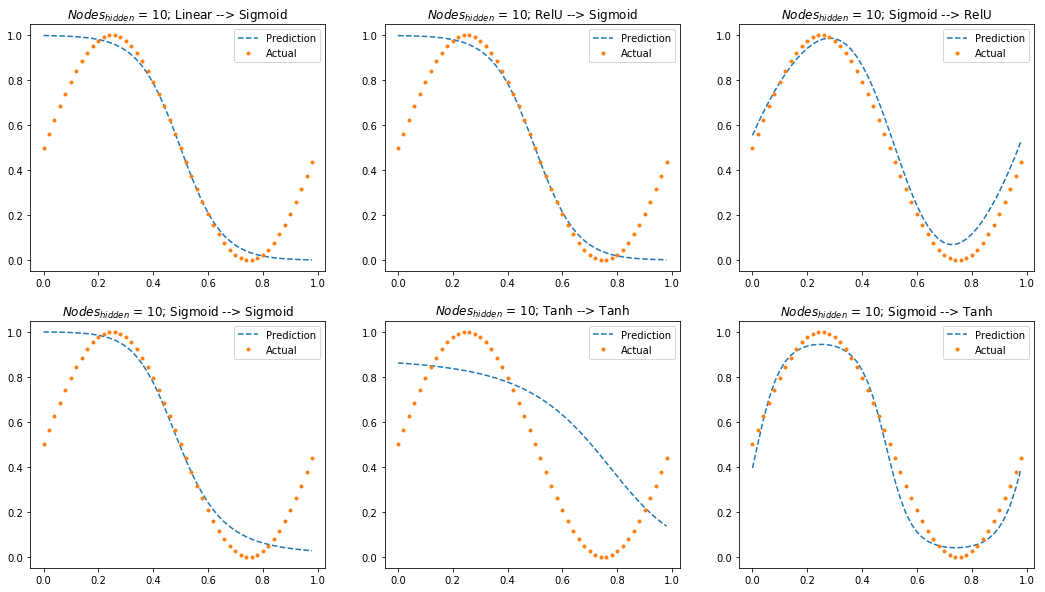

In [829]:
fig, ax = plt.subplots(2,3, figsize = (18,10))

ax[0,0].plot(x_train[:,1],layer2_ls_ud, '--', label = 'Prediction')
ax[0,0].plot(x,y,'.', label = 'Actual')
ax[0,0].legend()
ax[0,0].set_title('$Nodes_{hidden}$ = %s; Linear --> Sigmoid' %(n_h))

ax[0,1].plot(x_train[:,1],layer2_rs_ud, '--', label = 'Prediction')
ax[0,1].plot(x,y,'.', label = 'Actual')
ax[0,1].legend()
ax[0,1].set_title('$Nodes_{hidden}$ = %s; RelU --> Sigmoid' %(n_h))

ax[0,2].plot(x_train[:,1],layer2_rt_ud, '--', label = 'Prediction')
ax[0,2].plot(x,y,'.', label = 'Actual')
ax[0,2].legend()
ax[0,2].set_title('$Nodes_{hidden}$ = %s; Sigmoid --> RelU' %(n_h))

ax[1,0].plot(x_train[:,1],layer2_ss_ud, '--', label = 'Prediction')
ax[1,0].plot(x,y,'.', label = 'Actual')
ax[1,0].legend()
ax[1,0].set_title('$Nodes_{hidden}$ = %s; Sigmoid --> Sigmoid' %(n_h))

ax[1,1].plot(x_train[:,1],layer2_tt_ud, '--', label = 'Prediction')
ax[1,1].plot(x,y,'.', label = 'Actual')
ax[1,1].legend()
ax[1,1].set_title('$Nodes_{hidden}$ = %s; Tanh --> Tanh' %(n_h))

ax[1,2].plot(x_train[:,1],layer2_st_ud, '--', label = 'Prediction')
ax[1,2].plot(x,y,'.', label = 'Actual')
ax[1,2].legend()
ax[1,2].set_title('$Nodes_{hidden}$ = %s; Sigmoid --> Tanh' %(n_h))

plt.savefig('ML5_training_sin_hn_10_v2.png')

###### Graph of the cost function per iteration.

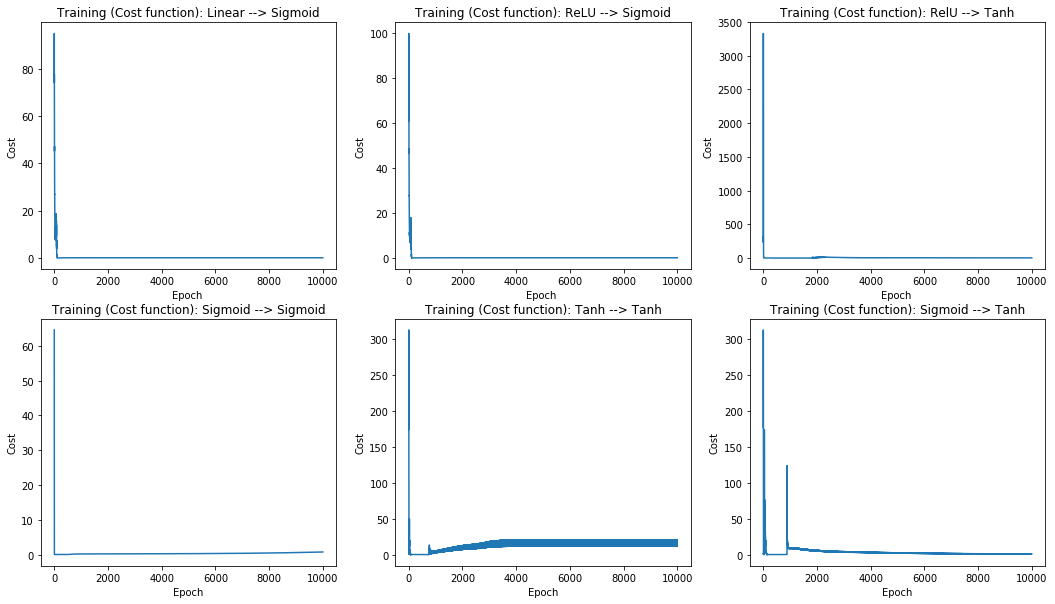

In [830]:
x_axis = np.linspace(0,iteration+1,iteration+1)

fig, ax = plt.subplots(2,3, figsize = (18,10))

ax[0,0].plot(x_axis, np.array(grads['erf']).T)
ax[0,0].set_xlabel('Epoch ')
ax[0,0].set_ylabel('Cost')
ax[0,0].set_title('Training (Cost function): Linear --> Sigmoid')

ax[0,1].plot(x_axis, np.array(grads2['erf']).T)
ax[0,1].set_xlabel('Epoch ')
ax[0,1].set_ylabel('Cost')
ax[0,1].set_title('Training (Cost function): ReLU --> Sigmoid')

ax[0,2].plot(x_axis, np.array(grads3['erf']).T)
ax[0,2].set_xlabel('Epoch ')
ax[0,2].set_ylabel('Cost')
ax[0,2].set_title('Training (Cost function): RelU --> Tanh')

ax[1,0].plot(x_axis,  np.array(grads4['erf']).T)
ax[1,0].set_xlabel('Epoch')
ax[1,0].set_ylabel('Cost')
ax[1,0].set_title('Training (Cost function): Sigmoid --> Sigmoid')

ax[1,1].plot(x_axis, np.array(grads5['erf']).T)
ax[1,1].set_xlabel('Epoch')
ax[1,1].set_ylabel('Cost')
ax[1,1].set_title('Training (Cost function): Tanh --> Tanh')

ax[1,2].plot(x_axis, np.array(grads1['erf']).T)
ax[1,2].set_xlabel('Epoch')
ax[1,2].set_ylabel('Cost')
ax[1,2].set_title('Training (Cost function): Sigmoid --> Tanh')

plt.savefig('ML5_training_sin_cost_hn_10_v2.png')

## II - Neural Network for classification
The objective of this activity is to make a neural network to classify the fruit data in ML2 (Perceptron)

### A. Fruit data
Reading and loading our fruit dataset.

In [329]:
# Create dataframe for each fruit class

mango = pd.read_excel('ML_dataset.xlsx', sheet_name = 'Class 1 - Mango')
orange = pd.read_excel('ML_dataset.xlsx', sheet_name = 'Class 2 - Orange')
banana = pd.read_excel('ML_dataset.xlsx', sheet_name = 'Class 3 - Banana')
mango = pd.DataFrame(mango)
orange = pd.DataFrame(orange)
banana = pd.DataFrame(banana)
mango["Class_name"] = 'Mango'
orange["Class_name"] = 'Orange'
banana["Class_name"] = 'Banana'
orange.head()

Image        R        G        B        Hue   StDev  Median   Skew     AR  \
0      1  236.764  200.613  153.233  34.032874  33.247     138  0.660  1.025   
1      2  245.911  266.276  179.424  78.378029  37.526     156  0.758  1.010   
2      3  116.534  109.282   18.273  55.571793  28.342     115  0.587  1.681   
3      4  220.972  215.616  191.501  49.095721  32.131     147  0.943  1.130   
4      5  249.121  206.316  122.162  39.770635  20.441     151  1.635  1.037   

   Round Class_name  
0  0.976     Orange  
1  0.990     Orange  
2  0.595     Orange  
3  0.885     Orange  
4  0.965     Orange

In [331]:
def hue(R,G,B):
    vals = [R, G, B]
    max_vals = max(vals)
    min_vals = min(vals)
    
    if max_vals == R:
        hue = 60 * (G-B)/(max_vals - min_vals)
    elif max_vals == G:
        hue = 60 * (2+(B-R)/(max_vals - min_vals))
    else:
        hue = 60 * (4+(R-G)/(max_vals - min_vals))
    
    return hue

In [332]:
# Additional column names: Hue, Class, and Class_name
mango['Hue'] = mango.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
mango["Class"] = 1
orange['Hue'] = orange.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
orange["Class"] = 0
banana['Hue'] = banana.apply(lambda x: hue(x['R'], x['G'], x['B']), axis = 1)
banana["Class"] = 1
banana.shape

(21, 12)

### B. Train and test sets
Here, we divide our data into two, the first half will be for training while the other half will be for testing. We will be using the mango and orange datasets to feed to our neural network

In [831]:
# Train set
data = pd.concat([mango.iloc[0:21//2], orange.iloc[0:22//2]], ignore_index = True, sort = False) # Locate all 28 
data['Hue_norm'] = data['Hue']/max(data['Hue'])                                            # Normalize hue
data = data.drop(columns = ['Image', 'R', 'G', 'B', 'Skew'])                               # drop all unnecessary columns
data['x_0'] = 1.0                                                                          # For x_0 from the equation

# Test set
test = pd.concat([mango.iloc[22//2:20], orange.iloc[21//2:]], ignore_index = True, sort = False)
test = test.drop(columns = ['R', 'G', 'B', 'Skew'])
test['Hue_norm'] = test['Hue']/max(data['Hue'])
test['x_0'] = 1.0  

In [832]:
# Train set
X1 = list(data['Hue_norm'])
X2 = list(data['Round'])
x = np.array(data[['x_0','Hue_norm','Round']]) 
Y = np.array(data[['Class']])

# Test set
X1_test = list(test['Hue_norm'])
X2_test = list(test['Round'])
x_test = np.array(test[['x_0','Hue_norm','Round']])
Y_test = np.array(test[['Class']])
x.shape

(21, 3)

In [833]:
# Lezz train
def predict(x, y, weights, l_rate, iteration, h_activation, out_activation):
    """
    1-layer Neural Network
    
    Parameters
    ----------
        x              -- array; contains the bias x_0 and the feature/s of the samples  
        y              -- array; contains the actual values of the classes  
        weights        -- dictionary containing the initial weights (random) 
        l_rate         -- learning ratewhich is a scalar value usually of range 0 to 1
        iteration      -- scalar; number of epoch
        h_activation   -- activation function to be used from the input layer to the hidden layer
        out_activation -- activation function to be used from the hidden layer to the output layer
    
    Returns
    -------
        weights -- dictionary containing the updated weights
        grads   -- dictionary containing the gradients and the cost for each epoch
        layer2  -- array of the prediction

    """
    w0 = weights['W0']
    w1 = weights['W1']
    b2 = weights['b2']
    b1 = weights['b1']
    error = []
    delta1 = []
    delta2 = []
    erf = []
    
    l_rate2 = 0.02
#     change = np.zeros((iteration//10, weights.shape[0]))
    
    for i in range(iteration):
        layer0 = x
        layer1 = h_activation(np.dot(layer0, w0.T)+b1) # Activation function
        layer2 = out_activation(np.dot(layer1,w1.T)+b2)
        
        layer2_error = y-layer2 # calculates the error of the output
        erf.append(0.5*np.sum(layer2_error)**2)
        
    # Error Gradients:
        layer2_delta = layer2_error*out_activation(np.dot(layer1,w1.T), deriv=True)
        layer1_delta = layer2_delta.dot(w1)*h_activation(np.dot(layer0,w0.T), deriv = True)   
        
    # Updating weights:     
        w1 += l_rate*(layer1.T.dot(layer2_delta)).T
        w0 += l_rate2*(layer0.T.dot(layer1_delta)).T
        
        delta1.append(np.sum(layer1.T.dot(layer2_delta)))
        delta2.append(np.sum(layer0.T.dot(layer1_delta)))
         
        if (i%100) == 0:
            error.append(np.mean(np.abs(layer2_error)))
            print("Error after %s = %f" %(i, np.mean(np.abs(layer2_error)))) # displays error in decimal
   
    update_weights = {"W0": w0,
               "W1": w1, "b2": b2, "b1": b1}
    
    grads = {"dW0": delta1,
             "dW1": delta2,
             "erf": erf}

    return update_weights, grads, layer2

In [840]:
l_rate = 0.1
iteration = 1000

n_i = x.shape[1]
n_h = 10
n_o = 1
init = initialize(n_i, n_h, n_o)
w_0 = init['W0']
w_1 = init['W1']

print("w0 = " + str(w_0)+'\n')
print("w1 = " + str(w_1))
update, grads, layer2 = predict(x, Y, init, l_rate, iteration, lin, sigm)

print("\nupated w0 = " + str(update['W0']))
print("updated w1 = " + str(update['W1']))
layer2.shape

w0 = [[ 0.0089257   0.00619542  0.00026951]
 [-0.0112344  -0.00336456  0.00901644]
 [-0.00403019 -0.00024765 -0.0163973 ]
 [ 0.00398029  0.00555254 -0.01112468]
 [ 0.00345518 -0.00010803  0.0047162 ]
 [-0.00380624 -0.00978973  0.01728101]
 [-0.01676636  0.01704506 -0.00129699]
 [ 0.0224825   0.01181574 -0.00283821]
 [-0.01518472 -0.01083967 -0.02014282]
 [ 0.00583019  0.00488014  0.01285358]]

w1 = [[-0.00528445  0.00139342  0.01349741 -0.00241736  0.00015968  0.00599194
   0.00136732 -0.00823511  0.00067615 -0.00433458]]
Error after 0 = 0.511021
Error after 100 = 0.497469
Error after 200 = 0.495636
Error after 300 = 0.491160
Error after 400 = 0.474270
Error after 500 = 0.425581
Error after 600 = 0.372407
Error after 700 = 0.346744
Error after 800 = 0.336571
Error after 900 = 0.332491

upated w0 = [[-0.02943754 -0.05755513  0.26954234]
 [-0.12368688 -0.14373605  0.59327139]
 [ 0.20593032  0.19799977 -0.8314805 ]
 [ 0.09514174  0.07790216 -0.30403263]
 [-0.06551246 -0.09535783  0.403050

(21, 1)

In [841]:
layer0 = x_test
layer1 = lin(np.dot(layer0, update['W0'].T)+update['b1']) # Activation function
layer2 = sigm(np.dot(layer1,update['W1'].T)+update['b2'])
layer2 = (layer2>=0.5).astype(int)
layer2 = np.array(matrix(layer2))
# layer2 = layer2[""]
predicted = []
for i in range(len(layer2)):
    if layer2[i]==1:
        predicted.append('Mango')
    else:
        predicted.append('Orange')
layer2.shape

(20, 1)

In [360]:
Y.shape

(21, 1)

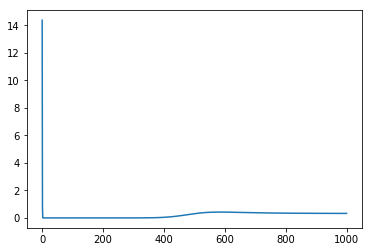

In [842]:
dw1 = grads['erf']
x_axis = np.linspace(0,iteration, len(dw1))

# plt.plot(x_axis, dw1[:,0], label = '$w_0$')
# plt.plot(x_axis, dw1[:,1], label = '$w_1$')
# plt.plot(x_axis, dw1[:,2], label = '$w_2$')
# plt.plot(x_axis, dw1[:,3], label = '$w_3$')
# plt.ylabel('Weight change')
# plt.xlabel('Iteration')
# plt.legend()

plt.plot(np.linspace(0,len(grads['erf']),len(grads['erf'])), np.array(grads['erf']).T)
# plt.savefig('ML5_costfunction_mvo.png')

In [843]:
# Accuracy measure

scores = accuracy_metric(Y_test,layer2)
print("\nAccuracy=%f" % (scores))


Accuracy=85.000000


In [838]:
def images(image, ys):
    """Plot clusters given the design matrix and cluster labels"""
    k_max = len(image) + 1
    k_mid = k_max//3
    fig, ax = plt.subplots(3, k_max//3,figsize=(15,5),gridspec_kw=dict(wspace=0.05),subplot_kw=dict(aspect='equal') ,dpi=200)
#     plt.subplots_adjust(bottom=0)
    for k, y in zip(range(0, k_max+1), image):
        if k < k_mid:
            ax[0][k].imshow(image[k])
            ax[0][k].set_title("Class = " + str((ys[k])), fontsize = 8)
            ax[0][k].set_axis_off()
            
        elif k < k_mid+7:
            ax[1][k-k_mid].imshow(image[k])
            ax[1][k-k_mid].set_title("Class = " + str((ys[k])), fontsize = 8)
            ax[1][k-k_mid].set_axis_off()
        else:
            ax[2][k-2*k_mid].imshow(image[k])
            ax[2][k-2*k_mid].set_title("Class = " + str((ys[k])), fontsize = 8)
            ax[2][k-2*k_mid].set_axis_off()
    return ax

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021B09B136D8>,
      dtype=object)

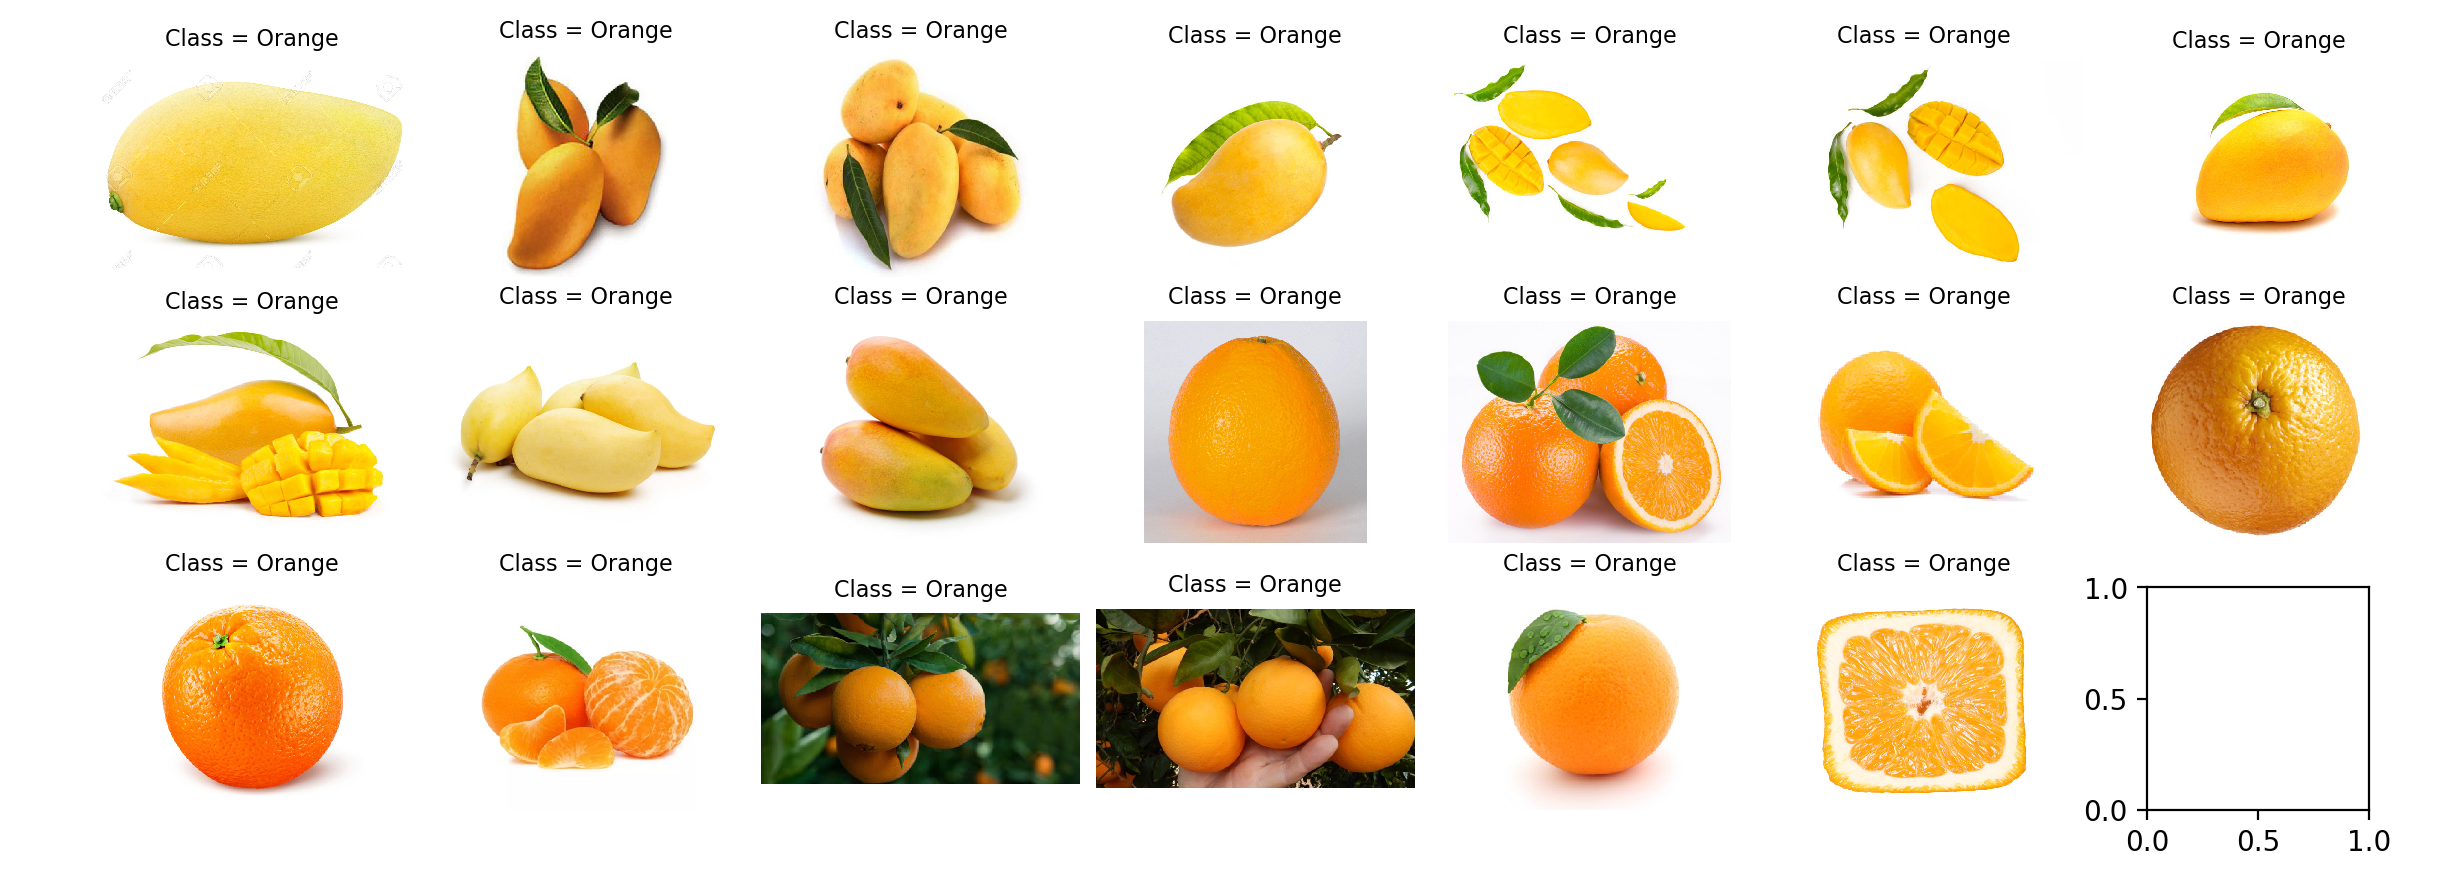

In [839]:
my_image = []
fname = []
image = []


for i in range(20):
    if i < 10:
        my_image.append("Image_"+str(i+11)+".jpg")
    #     print("Ripeness = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Mango/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
    else:
        my_image.append("Image_"+str(i+2)+".jpg")
    #     print("Probability = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Orange/Orange/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
images(image, predicted)
# plt.savefig('ML5test_mango_orange.png')

### Banana vs Orange Classification

In [416]:
# Train set
data = pd.concat([banana.iloc[0:21//2], orange.iloc[0:22//2]], ignore_index = True, sort = False) # Locate all 28 
data['Hue_norm'] = data['Hue']/max(data['Hue'])                                            # Normalize hue
data = data.drop(columns = ['Image', 'R', 'G', 'B', 'Skew'])                               # drop all unnecessary columns
data['x_0'] = 1.0                                                                          # For x_0 from the equation

# Test set
test = pd.concat([banana.iloc[22//2:20], orange.iloc[21//2:]], ignore_index = True, sort = False)
test = test.drop(columns = ['R', 'G', 'B', 'Skew'])
test['Hue_norm'] = test['Hue']/max(data['Hue'])
test['x_0'] = 1.0  

In [417]:
# Train set
X1 = list(data['Hue_norm'])
X2 = list(data['Round'])
x = np.array(data[['x_0','Hue_norm','Round']]) 
Y = np.array(data[['Class']])

# Test set
X1_test = list(test['Hue_norm'])
X2_test = list(test['Round'])
x_test = np.array(test[['x_0','Hue_norm','Round']])
Y_test = np.array(test[['Class']])
x.shape

(21, 3)

In [418]:
l_rate = 0.1
iteration = 1000

n_i = x.shape[1]
n_h = 10
n_o = 1
init = initialize(n_i, n_h, n_o)
w_0 = init['W0']
w_1 = init['W1']

print("w0 = " + str(w_0)+'\n')
print("w1 = " + str(w_1))
update, grads, layer2 = predict(x, Y, init, l_rate, iteration, lin, sigm)

print("\nupated w0 = " + str(update['W0']))
print("updated w1 = " + str(update['W1']))

w0 = [[-1.35184859e-02  4.72497164e-03 -8.70735041e-03]
 [ 1.89122439e-04 -3.72831705e-03 -1.58614148e-02]
 [ 1.91627411e-02  1.39438723e-02  5.92353061e-03]
 [ 1.43123905e-02  7.88657922e-03  8.47157134e-04]
 [-5.42576510e-03 -8.26953885e-03 -1.94702264e-02]
 [-4.14176145e-03 -2.21016530e-05 -9.70098707e-03]
 [ 1.11119501e-03  2.88120388e-03  6.74227243e-03]
 [-1.25391962e-02  1.59342189e-02 -6.74843010e-03]
 [-9.07950756e-03  2.36981980e-03  1.38236223e-03]
 [-1.34529659e-03  9.60975346e-04 -1.61914712e-02]]

w1 = [[ 0.00311191 -0.00991321  0.00126926  0.00973723 -0.00393113  0.00104188
  -0.00282308  0.00279749  0.01032597 -0.0075902 ]]
Error after 0 = 0.511048
Error after 100 = 0.495967
Error after 200 = 0.491470
Error after 300 = 0.468368
Error after 400 = 0.346002
Error after 500 = 0.256869
Error after 600 = 0.222763
Error after 700 = 0.206590
Error after 800 = 0.197447
Error after 900 = 0.191669

upated w0 = [[ 0.08678178  0.16432529 -0.2942948 ]
 [-0.04487004 -0.18821462  0.236

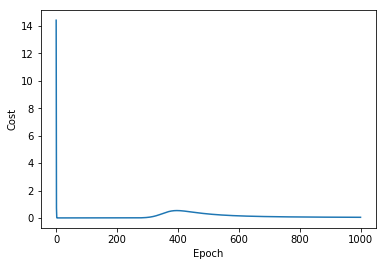

In [432]:
dw1 = grads['erf']
x_axis = np.linspace(0,iteration, len(dw1))

# plt.plot(x_axis, dw1[:,0], label = '$w_0$')
# plt.plot(x_axis, dw1[:,1], label = '$w_1$')
# plt.plot(x_axis, dw1[:,2], label = '$w_2$')
# plt.plot(x_axis, dw1[:,3], label = '$w_3$')
# plt.legend()

plt.plot(np.linspace(0,len(grads['erf']),len(grads['erf'])), np.array(grads['erf']).T)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.savefig('ML5_costfunction_bvo.png')

In [437]:
layer0 = x
layer1 = lin(np.dot(layer0, update['W0'].T)+update['b1']) # Activation function
layer2 = sigm(np.dot(layer1,update['W1'].T)+update['b2'])
layer2 = (layer2>=0.5).astype(int)
layer2 = np.array(matrix(layer2))
# layer2 = layer2[""]
predicted = []
for i in range(len(layer2)):
    if layer2[i]==1:
        predicted.append('Banana')
    else:
        predicted.append('Orange')
layer2.shape

(21, 1)

In [438]:
# Accuracy measure
scores = accuracy_metric(Y_test,layer2)
print("\nAccuracy=%f" % (scores))


Accuracy=90.000000


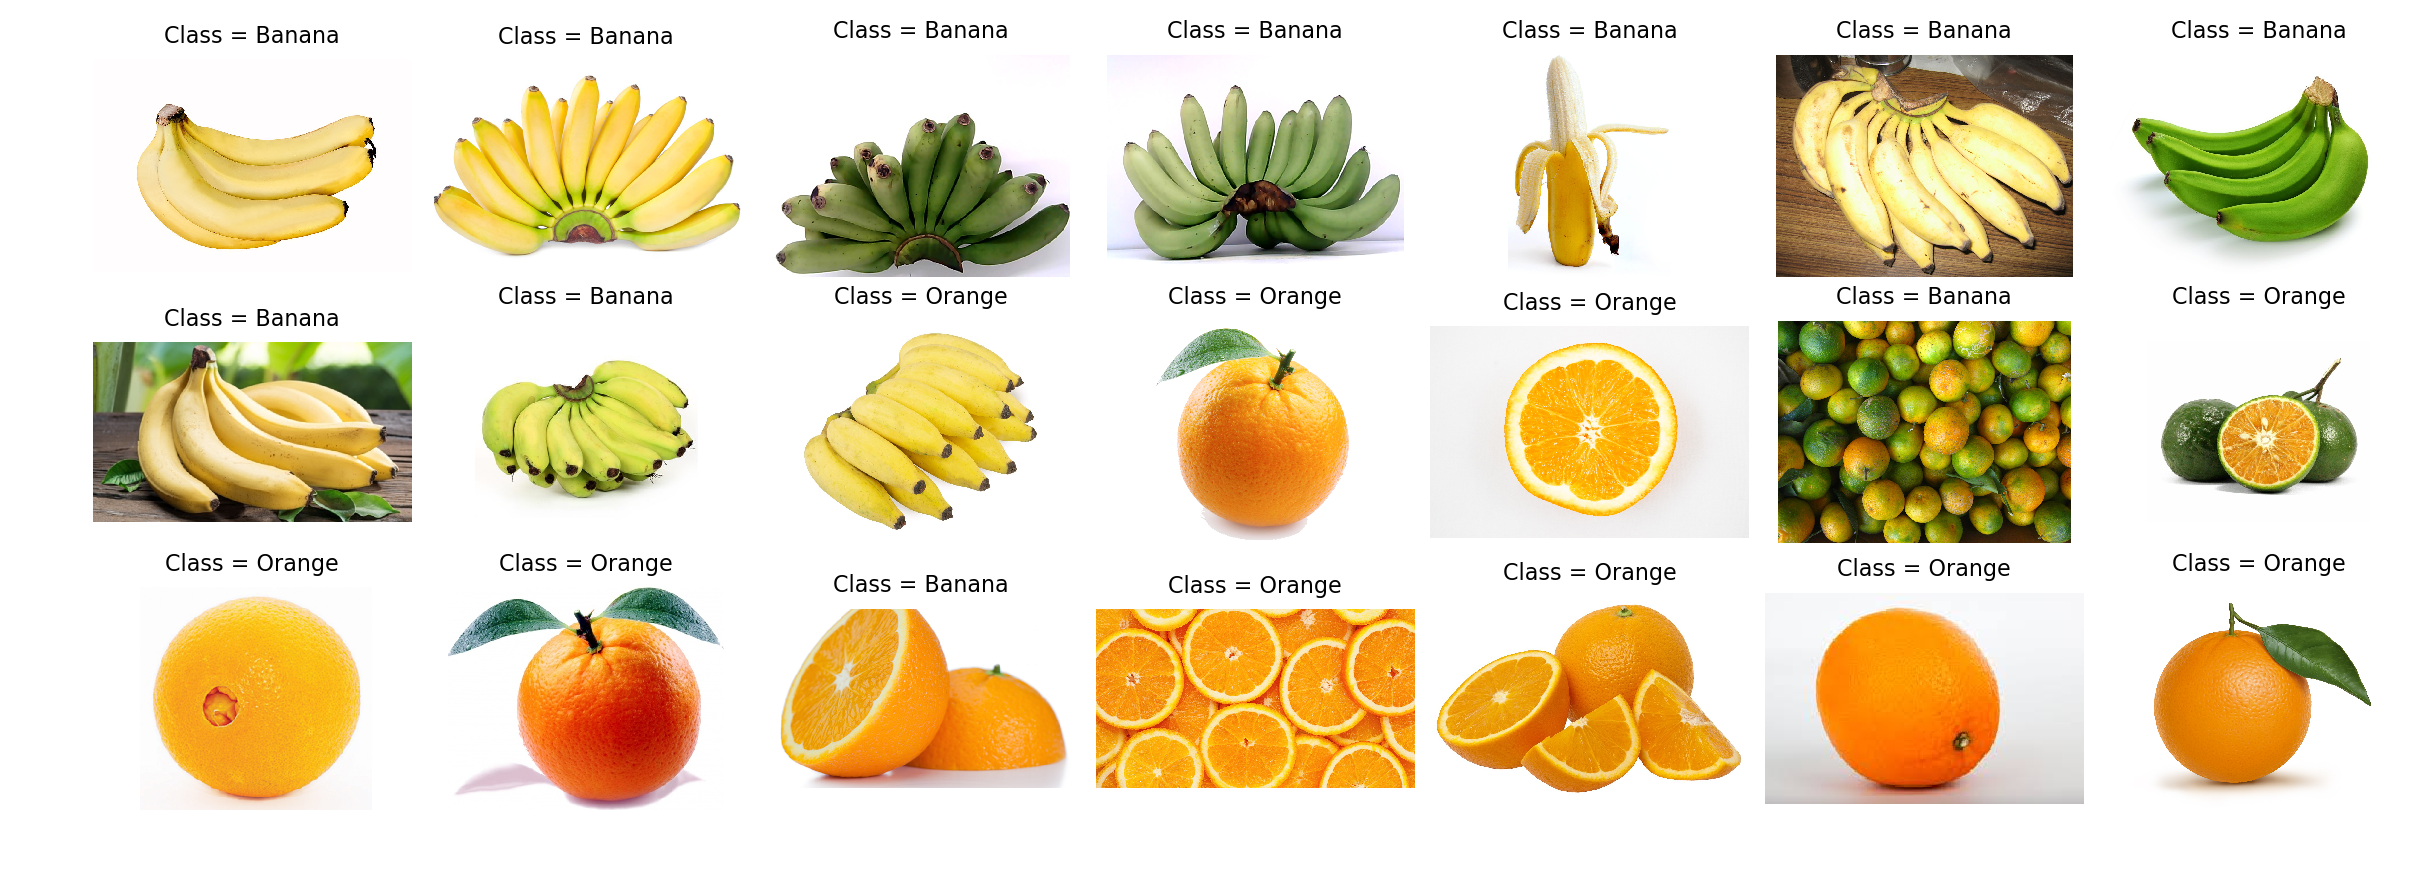

In [439]:
my_image = []
fname = []
image = []

for i in range(21):
    if i < 10:
        my_image.append("Image_"+str(i+1)+".jpg")
    #     print("Ripeness = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Banana/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
    else:
        my_image.append("Image_"+str(i-9)+".jpg")
    #     print("Probability = " + str(a.T[i])) #+ ", the algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")
        fname.append("E:/Acaaaaads/App Physics 186/Orange/Orange/" + my_image[i])
        image.append(np.array(plt.imread(fname[i])))
images(image, predicted)
plt.savefig('ML5train_banana_orange.png')